In [129]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import nltk
from nltk import word_tokenize

In [130]:
script = pd.read_csv('Game_of_Thrones_Script.csv')
script.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [131]:
scriptdesc = script.describe()
scriptdesc

,Release Date,Season,Episode,Episode Title,Name,Sentence
count,23911,23911,23911,23911,23908,23911
unique,73,8,10,73,564,22300
top,2017-08-13,Season 2,Episode 5,Eastwatch,tyrion lannister,No.
freq,505,3914,3083,505,1760,103


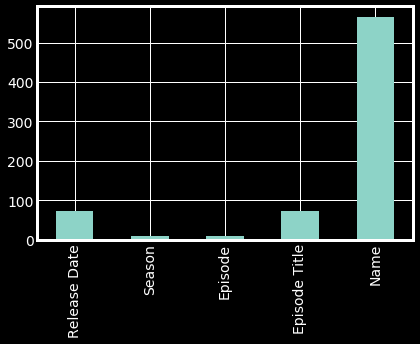

In [132]:
scriptdesc.iloc[1,:-1].plot(kind="bar")

In [133]:
len(script["Name"].unique())

565

In [134]:
nltk.download('punkt')

script['Tokenize Words'] = script['Sentence'].apply(lambda x: word_tokenize(x))
script['Tokenize Words Alphanumeric Only'] = script['Tokenize Words'].apply(lambda x: [item for item in x if item.isalnum()])
script['Sentence Word Count'] = script['Tokenize Words Alphanumeric Only'].apply(len)
script.head()

[nltk_data] Downloading package punkt to /home/maxisses/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenize Words,Tokenize Words Alphanumeric Only,Sentence Word Count
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, 're, savages,...","[What, do, you, expect, They, savages, One, lo...",25
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,"[I, 've, never, seen, wildlings, do, a, thing,...","[I, never, seen, wildlings, do, a, thing, like...",21
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[How, close, did, you, get]",5
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,"[Close, as, any, man, would, .]","[Close, as, any, man, would]",5
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[We, should, head, back, to, the, wall]",7


In [135]:
plt.style.available

['seaborn-ticks',
 'seaborn-poster',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'classic',
 'seaborn-whitegrid',
 'tableau-colorblind10',
 'seaborn-deep',
 'seaborn',
 'seaborn-pastel',
 'seaborn-paper',
 'seaborn-notebook',
 'seaborn-muted',
 'Solarize_Light2',
 'seaborn-dark',
 '_classic_test',
 'seaborn-darkgrid',
 'seaborn-bright',
 'fivethirtyeight',
 'seaborn-talk',
 'seaborn-white',
 'dark_background',
 'grayscale',
 'bmh',
 'fast']

In [136]:
script['Name'].unique()

array(['waymar royce', 'will', 'gared', 'royce', 'jon snow',
       'septa mordane', 'sansa stark', 'eddard stark', 'robb stark',
       'jonrobb', 'cassel', 'catelyn stark', 'bran stark',
       'theon greyjoy', 'jaime lannister', 'cersei lannister',
       'maester luwin', 'luwin', 'arya stark', 'robert baratheon',
       'tyrion lannister', 'ros', 'viserys', 'daenerys targaryen', 'maid',
       'illyrio', 'benjen', 'a voice', 'jorah mormont', 'khal drogo',
       'sandor clegane', 'doreah', 'irri', 'viserys targaryen',
       'joffrey lannister', 'myrcella baratheon', 'benjen stark',
       'assassin', 'jhiqui', 'rodrick cassel', 'mycah', 'soldier',
       'jory cassel', 'kings landing guard', 'varys', 'renly baratheon',
       'petyr baelish', 'grand maester pycelle', 'old nan', 'guard',
       'alliser thorne', 'jeor mormont', 'grenn', 'pyp', 'rast',
       'barristan selmy', 'lancel lannister', 'rakharo', 'yoren',
       'rhakaro', 'maester aemon', 'syrio forel', 'sam tarly',
   

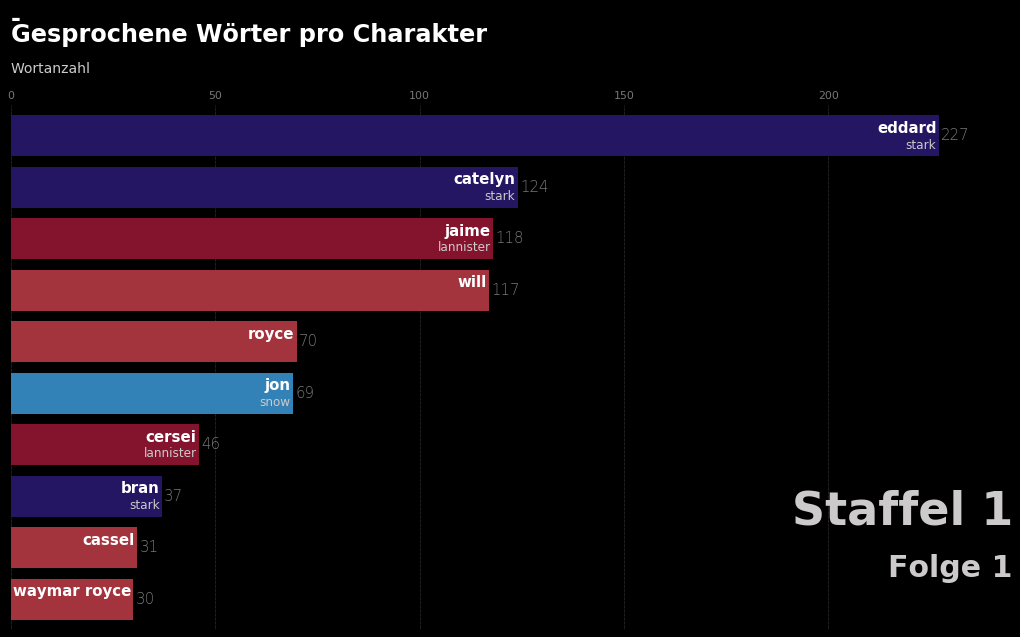

In [200]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import warnings

matplotlib.rcParams['animation.embed_limit'] = 2**128

script['Row'] = script.index

max_row = script['Row'].max()

# colors to seperate familys from each other

family_names = ['lannister','targaryen','snow','stark','baelish','greyjoy','mormont','baratheon','tyrell','clegane','other']

color_selections = ['#84142d','#3282b8','#3282b8','#241663','#834c69','#00454a','#57886c','#602080','#291f1e','#f64740','#a3333d']

def get_family_name(x):
    x = str(x)
    name_split = x.split(' ')
    if len(name_split) > 1 and name_split[1] in family_names[:-1]:
        return name_split[1]
    else:
        return family_names[-1]

script['Family Name'] = script['Name'].apply(get_family_name)# create dictionary for family color

colors = dict(zip(
    family_names,
    color_selections
    ))

family_group = script.set_index('Name')['Family Name'].to_dict()# functions to generate chart

def draw_chart(offset):
    plt.style.use('dark_background')
    temp_script = script.iloc[:offset]
    dff = temp_script.groupby(['Name'])['Season','Sentence Word Count'].agg({'Season':'max','Sentence Word Count':'sum'}).reset_index().sort_values(by=['Sentence Word Count'], ascending=[0]).head(10)
    season = dff['Season'].max()
    episode = temp_script[temp_script['Season'] == season]['Episode'].max()
    ax.clear()
    names = dff['Name'].values
    word_count = dff['Sentence Word Count'].values
    y_pos = np.arange(len(names))
    ax.barh(y_pos, word_count, color=[colors[family_group[name]] for name in names])
    ax.set_yticks(y_pos)
    ax.invert_yaxis()  # labels read top-to-bottom
    dx = dff['Sentence Word Count'].max() / 400# iterate over the values to plot labels and values
    for i, (value, name) in enumerate(zip(dff['Sentence Word Count'], dff['Name'])):
        if family_group[name] != 'other':
            ax.text(value-dx, i, name.split(' ')[0], size=15, weight=800, ha='right', va='bottom')
            ax.text(value-dx, i+.25, family_group[name], size=12, color='#cccaca', ha='right', va='baseline')
        else:
            ax.text(value-dx, i, name, size=15, weight=700, ha='right', va='bottom')
            ax.text(value-dx, i+.25, '', size=12, color='#cccaca', ha='right', va='baseline')
        ax.text(value+dx, i, f'{value:,.0f}',  size=15, ha='left',  va='center', weight=200, color='#777777')# styling chart
    ax.text(1, 0.2, "Staffel " + season.split(" ")[1], transform=ax.transAxes, color='#cccaca', size=46, ha='right', weight=600)
    ax.text(1, 0.1, "Folge "+ episode.split(" ")[1], transform=ax.transAxes, color='#cccaca', size=30, ha='right', weight=600)
    ax.text(0, 1.06, 'Wortanzahl', transform=ax.transAxes, size=14, color='#cccaca')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=11)
    ax.set_yticks([])
    ax.margins(0.08, 0.02)
    ax.grid(which='both', axis='x', linestyle=':', linewidth=0.5, c='grey')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, '-', transform=ax.transAxes, size=24, weight=600, ha='left', color='w')
    ax.text(0, 1.12, 'Gesprochene Wörter pro Charakter', transform=ax.transAxes, size=24, weight=600, ha='left')
    #ax.text(1, 0, '@albenft', size=12, transform=ax.transAxes, ha='left', color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)# create new fig, and generate animation using animator
    warnings.filterwarnings('ignore')
    
fig, ax = plt.subplots(figsize=(16, 9))
wordcountani = animation.FuncAnimation(fig, draw_chart, frames=range(100, max_row, 55))
#wordcountani = animation.FuncAnimation(fig, draw_chart, frames=range(100, max_row, 30))
HTML(wordcountani.to_jshtml())

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Max'), bitrate=1800)

wordcountani.save('wordcountani.mp4', writer=writer)


In [138]:
script.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenize Words,Tokenize Words Alphanumeric Only,Sentence Word Count,Row,Family Name
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, 're, savages,...","[What, do, you, expect, They, savages, One, lo...",25,0,other
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,"[I, 've, never, seen, wildlings, do, a, thing,...","[I, never, seen, wildlings, do, a, thing, like...",21,1,other
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[How, close, did, you, get]",5,2,other
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,"[Close, as, any, man, would, .]","[Close, as, any, man, would]",5,3,other
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[We, should, head, back, to, the, wall]",7,4,other


In [139]:
dff2 = script.groupby(['Family Name'])['Season','Sentence Word Count'].agg({'Season':'max','Sentence Word Count':'sum'}).reset_index().sort_values(by=['Sentence Word Count'], ascending=[0]).head(10)
dff2.head()

,Family Name,Season,Sentence Word Count
6,other,Season 8,132645
4,lannister,Season 8,61930
8,stark,Season 8,28257
9,targaryen,Season 8,13103
7,snow,Season 8,12245


In [140]:
colors

{'lannister': '#84142d',
 'targaryen': '#3282b8',
 'snow': '#3282b8',
 'stark': '#241663',
 'baelish': '#834c69',
 'greyjoy': '#00454a',
 'mormont': '#57886c',
 'baratheon': '#602080',
 'tyrell': '#291f1e',
 'clegane': '#f64740',
 'other': '#a3333d'}

In [141]:
script_small = script

In [142]:
script_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Release Date                      23911 non-null  object
 1   Season                            23911 non-null  object
 2   Episode                           23911 non-null  object
 3   Episode Title                     23911 non-null  object
 4   Name                              23908 non-null  object
 5   Sentence                          23911 non-null  object
 6   Tokenize Words                    23911 non-null  object
 7   Tokenize Words Alphanumeric Only  23911 non-null  object
 8   Sentence Word Count               23911 non-null  int64 
 9   Row                               23911 non-null  int64 
 10  Family Name                       23911 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.0+ MB


In [143]:
script['Family Name'].values

array(['other', 'other', 'other', ..., 'lannister', 'other', 'other'],
      dtype=object)

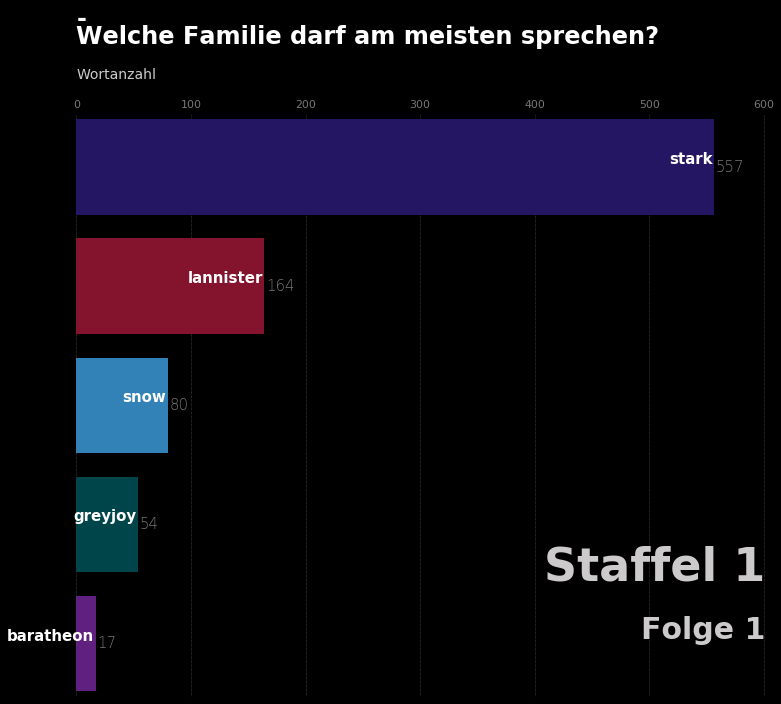

In [144]:
def draw_chart(offset):
    plt.style.use('dark_background')
    script_small_noo = script_small[script_small["Family Name"] != "other"]
    temp_script = script_small_noo.iloc[:offset]
    dff = temp_script.groupby(['Family Name'])['Season','Sentence Word Count'].agg({'Season':'max','Sentence Word Count':'sum'}).reset_index().sort_values(by=['Sentence Word Count'], ascending=[0]).head(10)
    season = dff['Season'].max()
    episode = temp_script[temp_script['Season'] == season]['Episode'].max()
    ax.clear()
    names = dff['Family Name'].values
    word_count = dff['Sentence Word Count'].values
    y_pos = np.arange(len(names))
    ax.barh(y_pos, word_count, color=[colors[name] for name in names])
    ax.set_yticks(y_pos)
    ax.invert_yaxis()  # labels read top-to-bottom
    dx = dff['Sentence Word Count'].max() / 400# iterate over the values to plot labels and values
    for i, (value, name) in enumerate(zip(dff['Sentence Word Count'], dff['Family Name'])):
        if str(name) != 'other':
            ax.text(value-dx, i, name.split(' ')[0], size=15, weight=800, ha='right', va='bottom')
            #ax.text(value-dx, i+.25, str(name), size=12, color='#cccaca', ha='right', va='baseline')
        else:
            ax.text(value-dx, i, name, size=15, weight=700, ha='right', va='bottom')
            #ax.text(value-dx, i+.25, '', size=12, color='#cccaca', ha='right', va='baseline')
        ax.text(value+dx, i, f'{value:,.0f}',  size=15, ha='left',  va='center', weight=200, color='#777777')# styling chart
    ax.text(1, 0.2, "Staffel " + season.split(" ")[1], transform=ax.transAxes, color='#cccaca', size=46, ha='right', weight=600)
    ax.text(1, 0.1, "Folge "+ episode.split(" ")[1], transform=ax.transAxes, color='#cccaca', size=30, ha='right', weight=600)
    ax.text(0, 1.06, 'Wortanzahl', transform=ax.transAxes, size=14, color='#cccaca')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=11)
    ax.set_yticks([])
    ax.margins(0.08, 0.01)
    ax.grid(which='both', axis='x', linestyle=':', linewidth=0.5, c='grey')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, '-', transform=ax.transAxes, size=24, weight=600, ha='left', color='w')
    ax.text(0, 1.12, 'Welche Familie darf am meisten sprechen?', transform=ax.transAxes, size=24, weight=600, ha='left')
    #ax.text(1, 0, '@albenft', size=12, transform=ax.transAxes, ha='left', color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)# create new fig, and generate animation using animator
    
fig, ax = plt.subplots(figsize=(11, 10))
wordcountfamily = animation.FuncAnimation(fig, draw_chart, frames=range(100, max_row, 30))
# animator = animation.FuncAnimation(fig, draw_chart, frames=range(100, max_row, 30))
HTML(wordcountfamily.to_jshtml())

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Max'), bitrate=1800)

wordcountfamily.save('wordcountanifamily.mp4', writer=writer)

In [196]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from os import path
import random
import os
from PIL import Image
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS# get list of top 20 characters
top_20 = script.groupby(['Name'])['Sentence Word Count'].sum().reset_index().sort_values(by=['Sentence Word Count']
                                                                                         , ascending=[0]).head(20)['Name'].tolist()# create my own set of stopwords
my_stop_words = ENGLISH_STOP_WORDS.union(['did','does','ca','don','wo','men','man','ll',
                                          'want','oh','yes','doing','going','like','ser',
                                          'eh','thing','aye','ve','just'])# function to generate and show the wordclouds


def generate_word_cloud(character):
    character_name = character
    list_words = script[script['Name'] == character_name]
    list_words = list_words['Tokenize Words Alphanumeric Only'].tolist()
    words = []
    
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    
    char_mask = np.array(Image.open(path.join(d, character_name.split(" ")[0] + ".jpg")))
    
    for i in list_words:
        words.extend(i)
    words = ''.join(i.lower() + ' ' for i in words)
    
    wc = WordCloud(background_color="white", max_words=10000, mask=char_mask,
               stopwords=my_stop_words, max_font_size=40, collocations=False)
    # generate word cloud
    wc.generate(words)
    
    image_colors = ImageColorGenerator(char_mask)

    # show
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    axes[0].imshow(char_mask, alpha=0.5, cmap=plt.cm.gray, interpolation="bilinear")
    #plt.title(character_name)
    #wc.to_file(character_name.split(" ")[0] + "_wc.png")
    for ax in axes:
        ax.set_axis_off()
    plt.savefig(character_name.split(" ")[0] + "_wc.png")
    plt.show()

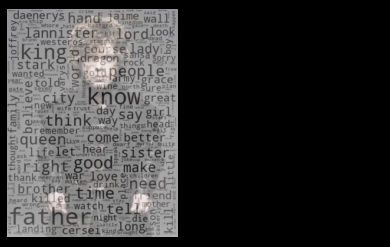

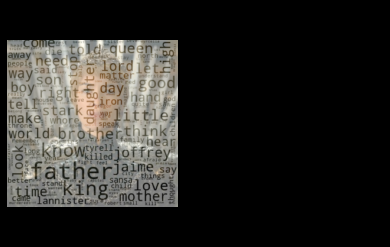

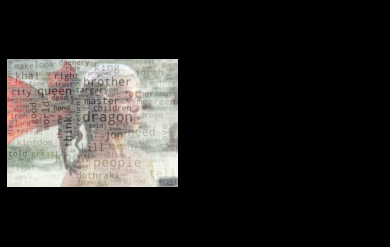

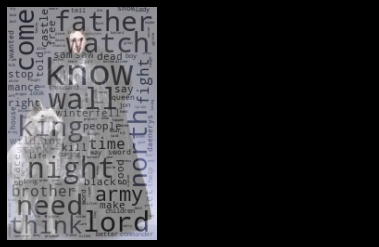

In [197]:
top_5 = ["tyrion lannister", "cersei lannister", "daenerys targaryen", "jon snow", "jaime lannister"]

for name in top_5:
    generate_word_cloud(name)

In [148]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
script['Sentiment Scores'] = script['Sentence'].apply(lambda x: TextBlob(x).sentiment)
script['Polarity'] = script['Sentiment Scores'].apply(lambda x: x[0])
script['Subjectivity'] = script['Sentiment Scores'].apply(lambda x: x[1])

In [149]:
script.to_csv('Game_of_Thrones_Script_count_senti.csv', encoding='utf-8', index=False)

In [150]:
script.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenize Words,Tokenize Words Alphanumeric Only,Sentence Word Count,Row,Family Name,Sentiment Scores,Polarity,Subjectivity
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, 're, savages,...","[What, do, you, expect, They, savages, One, lo...",25,0,other,"(-0.125, 0.375)",-0.125,0.375
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,"[I, 've, never, seen, wildlings, do, a, thing,...","[I, never, seen, wildlings, do, a, thing, like...",21,1,other,"(0.0, 0.0)",0.000,0.000
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[How, close, did, you, get]",5,2,other,"(0.0, 0.0)",0.000,0.000
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,"[Close, as, any, man, would, .]","[Close, as, any, man, would]",5,3,other,"(0.0, 0.0)",0.000,0.000
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[We, should, head, back, to, the, wall]",7,4,other,"(0.0, 0.0)",0.000,0.000


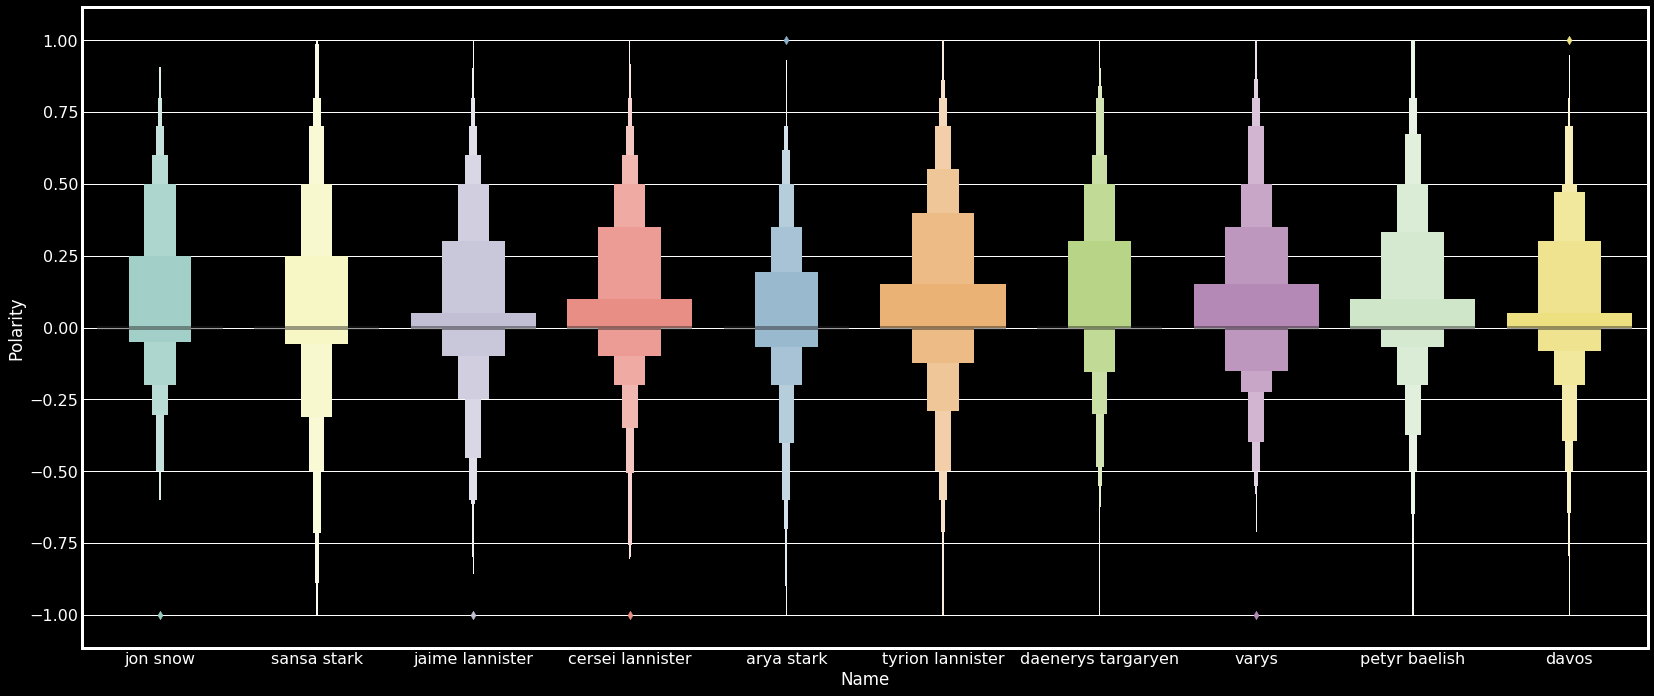

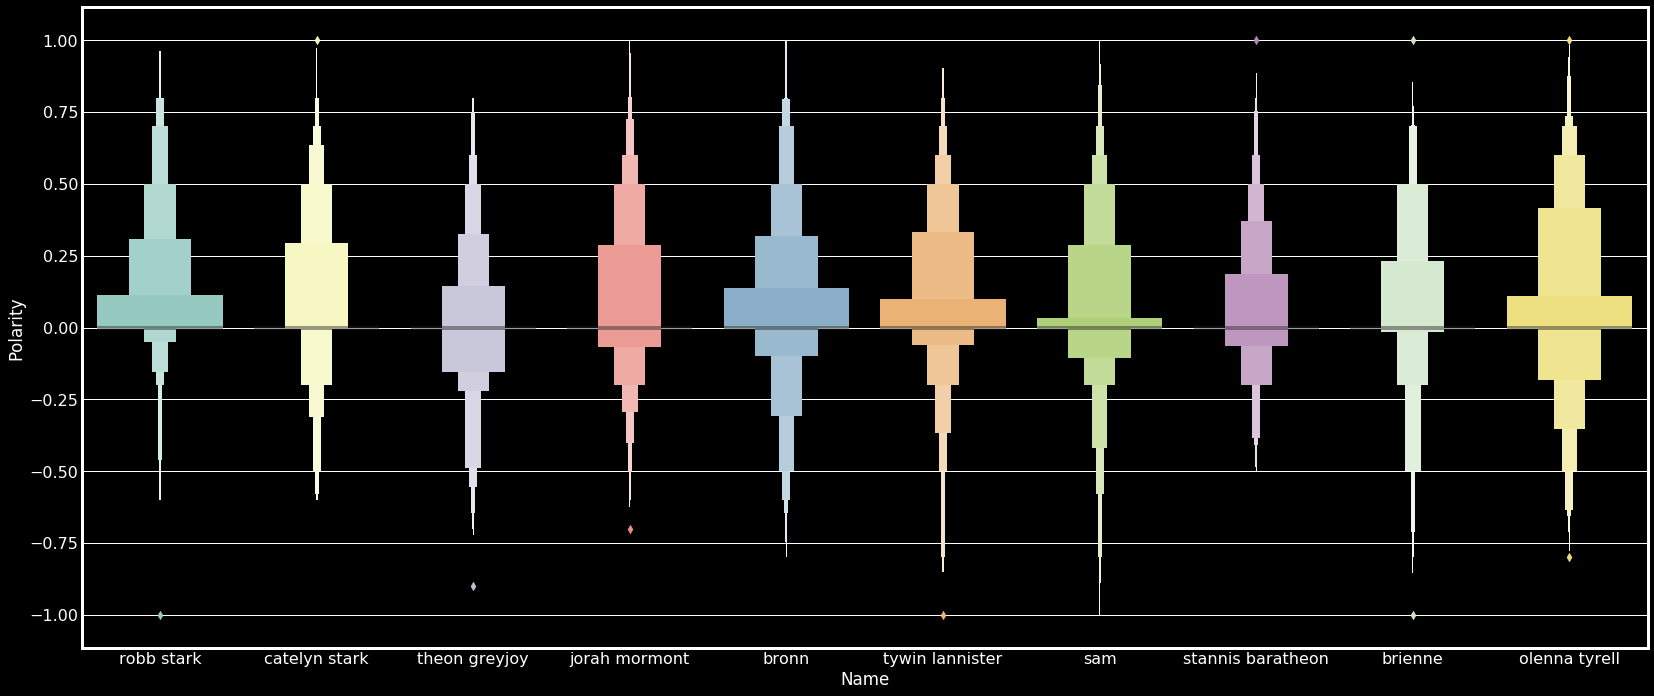

In [151]:
fig, ax = plt.subplots(figsize=(25,11))
ax.tick_params(axis='x', labelsize=16, color='#777777')
ax.tick_params(axis='y', labelsize=16, color='#777777')
sns.boxenplot(x='Name', y='Polarity', data=script[script['Name'].isin(top_20[:10])])
plt.show()

fig, ax = plt.subplots(figsize=(25,11))
ax.tick_params(axis='x', labelsize=16, color='#777777')
ax.tick_params(axis='y', labelsize=16, color='#777777')
sns.boxenplot(x='Name', y='Polarity', data=script[script['Name'].isin(top_20[10:])])
plt.show()

In [152]:
script['Positive Polarity'] = script['Polarity'].apply(lambda x: 1 if x >= 0.5 else 0)
script['Negative Polarity'] = script['Polarity'].apply(lambda x: 1 if x <= -0.5 else 0)
script['Neutral Polarity'] = script['Polarity'].apply(lambda x: 1 if x > -0.5 and x < 0.5 else 0)# count each polarity labels
char_polarities = script.groupby(['Name'])['Positive Polarity','Negative Polarity','Neutral Polarity'].sum().reset_index()# get proportion of each label
char_polarities['Positive Polarity Rate'] = char_polarities['Positive Polarity'] / (char_polarities['Positive Polarity'] + char_polarities['Negative Polarity'] + char_polarities['Neutral Polarity'])
char_polarities['Negative Polarity Rate'] = char_polarities['Negative Polarity'] / (char_polarities['Positive Polarity'] + char_polarities['Negative Polarity'] + char_polarities['Neutral Polarity'])
top_5_positive = char_polarities[char_polarities['Name'].isin(top_20)].sort_values(by=['Positive Polarity Rate'], ascending=[0]).head(5)
top_5_negative = char_polarities[char_polarities['Name'].isin(top_20)].sort_values(by=['Negative Polarity Rate'], ascending=[0]).head(5)

In [153]:
char_polarities[char_polarities["Name"].isin(top_20)].head(20).sort_values(by=['Positive Polarity Rate'], ascending=[0])

,Name,Positive Polarity,Negative Polarity,Neutral Polarity,Positive Polarity Rate,Negative Polarity Rate
342,olenna tyrell,18,7,147,0.104651,0.040698
509,tyrion lannister,173,56,1531,0.098295,0.031818
70,cersei lannister,96,22,887,0.095522,0.021891
409,robb stark,29,3,274,0.094771,0.009804
519,varys,34,8,329,0.091644,0.021563
69,catelyn stark,26,7,252,0.091228,0.024561
86,daenerys targaryen,91,17,940,0.086832,0.016221
57,bronn,34,17,342,0.086514,0.043257
180,jaime lannister,76,29,840,0.080423,0.030688
56,brienne,29,13,328,0.078378,0.035135


In [154]:
char_polarities[char_polarities["Name"].isin(top_20)].head(20).sort_values(by=['Positive Polarity Rate'], ascending=True)

,Name,Positive Polarity,Negative Polarity,Neutral Polarity,Positive Polarity Rate,Negative Polarity Rate
492,theon greyjoy,18,15,422,0.039560,0.032967
23,arya stark,38,22,723,0.048531,0.028097
470,stannis baratheon,16,2,278,0.054054,0.006757
90,davos,33,10,485,0.062500,0.018939
193,jon snow,72,22,1039,0.063548,0.019417
437,sansa stark,55,36,693,0.070153,0.045918
510,tywin lannister,27,8,346,0.070866,0.020997
196,jorah mormont,28,5,348,0.073491,0.013123
430,sam,30,12,357,0.075188,0.030075
354,petyr baelish,34,11,404,0.075724,0.024499
